# Python Exercises - Data Science Final 
 
By Noam Goldis

In [1]:
# First, let's import all the tools we'll need for later

import pandas as pd

import numpy as np

# Coding Exercise 1: 
Write a Python Function that receives a Decimal form number and prints it out in all other forms:
(Binary form, Octal form, Hexadecimal form)

In [2]:
# let's create helper functions first


# decimal to binary helper function:

def binary_converter(n):
    num = n
    lst = []
    while n >= 1:
        lst.append(int(n%2))
        n = n//2
        if n == 1:
            lst.append(1)
            break
    
    lst.reverse()
    print(f"The Binary Form of {num} is: "+''.join(str(i) for i in lst))
    
# decimal to octal helper function:

def octal_converter(n):
    num = n
    lst = []
    
    if n<8:
        print(f"The Binary Form of {num} is: {num}")
    else:
        while n >0:
            lst.append(n%8)
            n = n//8
        lst.reverse()
        print(f"The Octal Form of {num} is: "+''.join(str(i) for i in lst))
    
# decimal to hexadecimal helper function:

def hexadecimal_converter(n):
    num = n
    conversion = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    lst = []
    while n > 0:
        remainder = n%16
        lst.append(conversion[remainder])
        n = n//16

    lst.reverse()
    print(f"The Hexadecimal Form of {num} is: 0x"+''.join(str(i) for i in lst))
    
# And finally, here is the function:
    
def converter(n):
    binary_converter(n)
    octal_converter(n)
    hexadecimal_converter(n)

In [3]:
# checking that it works with an example

converter(33)

The Binary Form of 33 is: 100001
The Octal Form of 33 is: 41
The Hexadecimal Form of 33 is: 0x21


# Coding Exercise 2:
Upload a dataset and answer the following questions using Pandas:

In [4]:
# Let's upload our file & save it as a variable

cast = pd.read_csv("cast.csv")


In [5]:
# Let's take a look at it by seeing the top 5 rows:

cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


# Question 1: How many movies have the title "Hamlet"?

In [6]:
titles= pd.read_csv("titles.txt")


len(titles[titles.title == "Hamlet"])

19

# Question 2: List all of the "Treasure Island" movies from earliest to most recent.

In [7]:
titles[titles.title == "Treasure Island"].sort_values("year")

,title,year
191379,Treasure Island,1918
47769,Treasure Island,1920
192917,Treasure Island,1934
90175,Treasure Island,1950
104714,Treasure Island,1972
103646,Treasure Island,1973
190792,Treasure Island,1985
166675,Treasure Island,1999


# Question 3: How many roles were credited in the silent 1921 version of Hamlet?

In [8]:
len(cast[(cast.title == "Hamlet") & (cast.year ==1921)])

9

# Question 4: Use groupby() to plot the number of "Hamlet" films made each decade

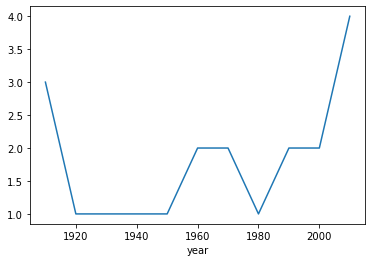

In [9]:
hamlet = titles[titles.title == "Hamlet"]
hamlet.groupby(hamlet.year // 10*10).size().plot()

# Question 5: How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [10]:
the_50s= cast[cast.year // 10 == 195]

the_50s = the_50s[the_50s.n==1]

the_50s.groupby(["year", "type"]).size()

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
      actress    284
1953  actor      634
      actress    290
1954  actor      626
      actress    298
1955  actor      606
      actress    264
1956  actor      614
      actress    288
1957  actor      708
      actress    284
1958  actor      694
      actress    275
1959  actor      678
      actress    287
dtype: int64

# Question 6: List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.

In [11]:
leading = cast[cast.year // 10 >= 199]

leading = leading[leading.n==1]

leading = leading.groupby(['name']).size().sort_values(ascending=False)

leading.head(10)

name
Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Eric Roberts           68
Amitabh Bachchan       68
Nagarjuna Akkineni     60
Dilip                  59
dtype: int64

# Question 7: List, in order by year, each of the films in which Frank Oz has played more than 1 role

In [12]:
frank_oz = cast[cast.name == "Frank Oz"]

frank_oz = frank_oz.groupby(["year", "title"]).size()

frank_oz = frank_oz[frank_oz>1]

frank_oz

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64